# **CosmiCode-Internship Week-5**

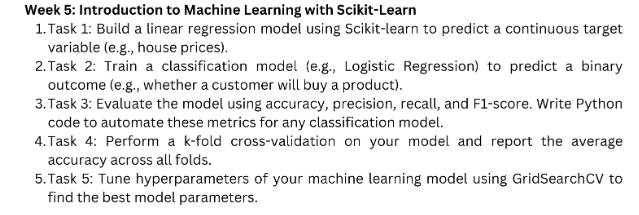

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_housing = pd.read_csv("Datasets/House Price Prediction/Housing.csv")

df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df_housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


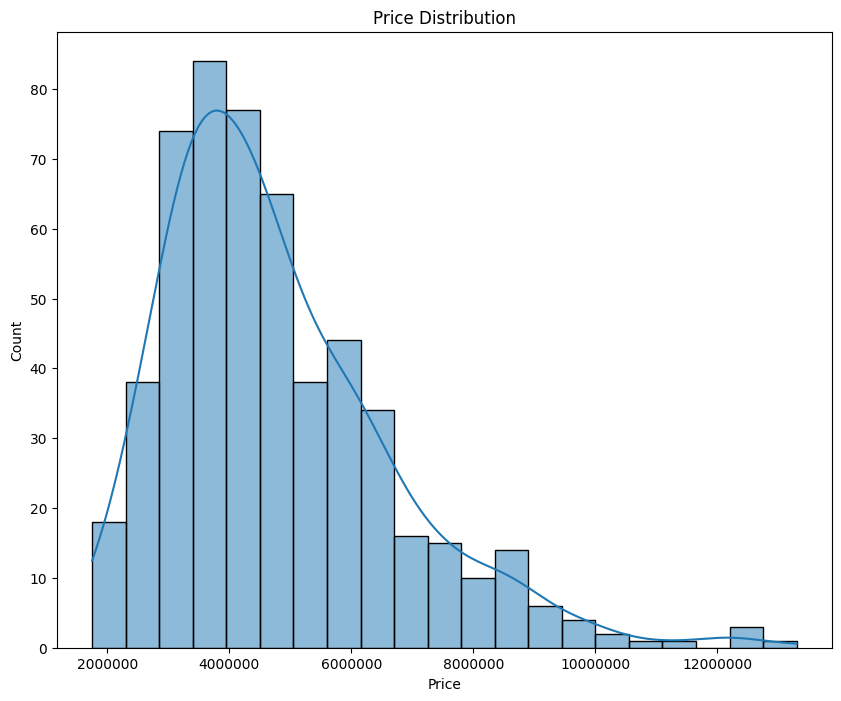

In [5]:
plt.figure(figsize=(10,8))
sns.histplot(df_housing["price"], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.ticklabel_format(axis='x', style='plain')
plt.show()

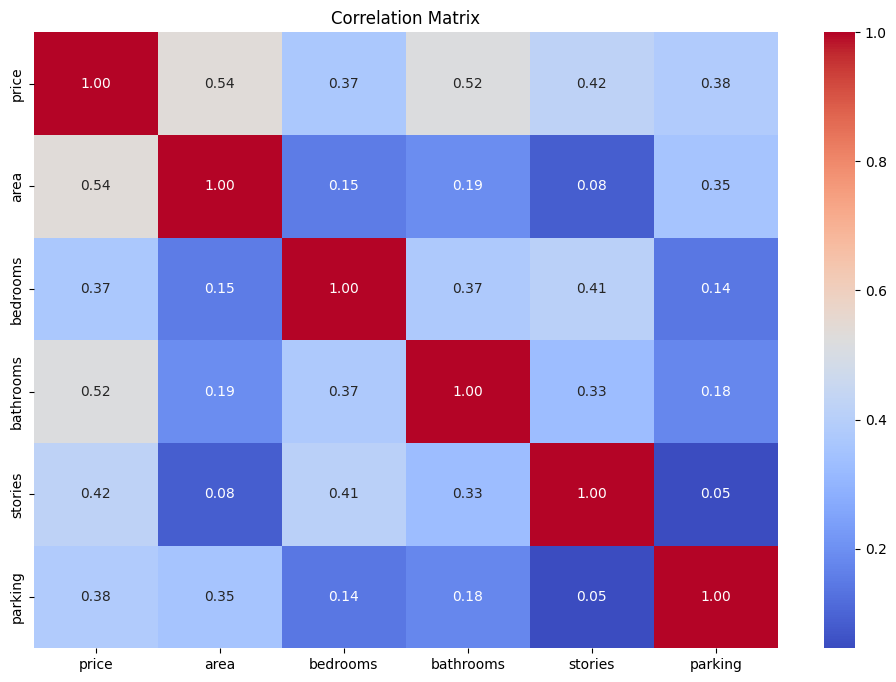

In [6]:
numeric_columns = df_housing.select_dtypes(include=['int64', 'float64'])
correlations = numeric_columns.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for feature in categorical_features:
    print(f"Feature: {feature}")
    print(df_housing[feature].value_counts())
    print("\n")


Feature: mainroad
mainroad
yes    468
no      77
Name: count, dtype: int64


Feature: guestroom
guestroom
no     448
yes     97
Name: count, dtype: int64


Feature: basement
basement
no     354
yes    191
Name: count, dtype: int64


Feature: hotwaterheating
hotwaterheating
no     520
yes     25
Name: count, dtype: int64


Feature: airconditioning
airconditioning
no     373
yes    172
Name: count, dtype: int64


Feature: prefarea
prefarea
no     417
yes    128
Name: count, dtype: int64


Feature: furnishingstatus
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64




In [8]:
# Encode categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_housing_encoded = df_housing.copy()

for feature in categorical_features:
    df_housing_encoded[feature] = df_housing_encoded[feature].apply(lambda x: 1 if x == 'yes' else 0)

# One-Hot Encoding for 'furnishingstatus'
df_housing_encoded = pd.get_dummies(df_housing_encoded, columns=['furnishingstatus'], drop_first=True)

# Display the updated DataFrame
df_housing_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [9]:
from sklearn.preprocessing import StandardScaler

numerical_feature = ['bedrooms', 'area', 'bathrooms', 'parking', 'stories']

scalar = StandardScaler()
df_housing_encoded[numerical_feature] = scalar.fit_transform(df_housing_encoded[numerical_feature])


df_housing_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,False,False


In [10]:
from sklearn.model_selection import train_test_split

X = df_housing_encoded.drop(columns = 'price')
y = df_housing_encoded["price"]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(f"Training feature shape\n{x_train.shape}")
print(f"testing feature shape\n{x_test.shape}")



Training feature shape
(381, 13)
testing feature shape
(164, 13)


### Task-1: Building the Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(x_test)

# Print the coefficients
print("Model Coefficients:", linear_model.coef_)
print("Model Intercept:", linear_model.intercept_)


Model Coefficients: [ 549164.54164962   59649.5044      559614.4809304   361644.23977858
  408073.6819066   275710.53305175  482603.52188223  616375.42271861
  685839.34559965  260916.61906937  509192.08881309 -121652.66300036
 -391191.24078511]
Model Intercept: 4037655.7030224786


- Mean Absolute Error: The average absolute difference between the actual and predicted values. Lower MAE is better. It represents how much (on average) the model is off from the actual value.
- Mean Square Error: The average squared difference between the actual and predicted values. Like MAE, but it penalizes larger errors more heavily (squaring amplifies large differences).
- R-Squared: Represents the proportion of variance in the target variable explained by the features. R-squared can be interpreted as follows:
    - R² ranges from 0 to 1.
    - Higher R² is better.


### Task-3.1: Evaluating the Regression Model

In [14]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 920392.9397607957
Mean Squared Error (MSE): 1523019469501.2913
R-squared (R2): 0.6463350878895877


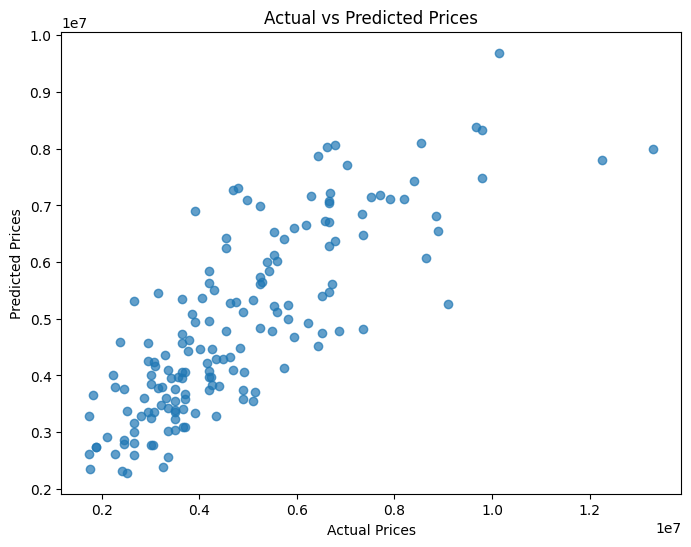

In [15]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


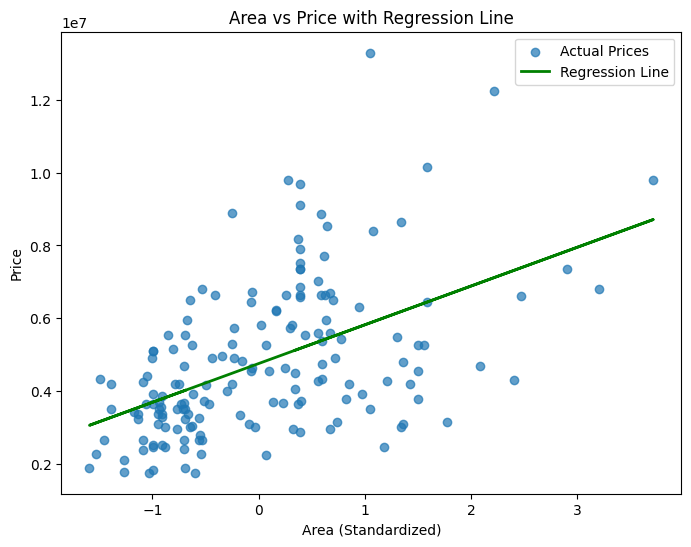

In [18]:
# Extracting only the 'area' feature
X_area = x_test[['area']]  # Use only 'area' for simplicity
y_area = y_test

# Train a new Linear Regression model for 'area'
linear_model_area = LinearRegression()
linear_model_area.fit(X_area, y_area)

# Predictions based on the single feature 'area'
y_pred_area = linear_model_area.predict(X_area)

# Plot the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of actual prices vs area
plt.scatter(X_area, y_area, label="Actual Prices", alpha=0.7)

# Plot the regression line
plt.plot(X_area, y_pred_area, color="green", label="Regression Line", linewidth=2)

plt.title("Area vs Price with Regression Line")
plt.xlabel("Area (Standardized)")
plt.ylabel("Price")
plt.legend()
plt.show()


### Task-2: Building the Classification Model

In [19]:
# Create a binary classification column
median_price = df_housing_encoded['price'].median()
df_housing_encoded['high_price'] = (df_housing_encoded['price'] > median_price).astype(int)

# Drop the 'price' column since we now classify based on 'high_price'
X_classification = df_housing_encoded.drop(columns=['price', 'high_price'])
y_classification = df_housing_encoded['high_price']

# Split into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_cls, y_train_cls)

# Predict on the test set
y_pred_cls = logistic_model.predict(X_test_cls)


### Task-3.1: Evaluating the Classification Model

Accuracy: 0.8292682926829268
Precision: 0.8289473684210527
Recall: 0.8076923076923077
F1 Score: 0.8181818181818182


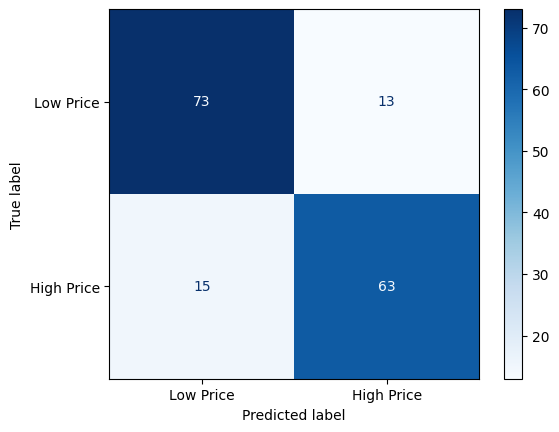

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls)
recall = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Price", "High Price"])
disp.plot(cmap="Blues")
plt.show()


- Accuracy: How often the model predicts correctly.
- Precision: Of all predicted High Prices, how many are actually High Price?
- Recall: Of all actual High Prices, how many did the model predict correctly?
- F1-Score: Harmonic mean of Precision and Recall, balancing both metrics.

The confusion matrix above is interpreted as:
- top-left: true negatives
- top-right: false positives
- bottom-left: false negatives
- bottom-right: true positives

### Task-4: Cross Validation


The cross-validation process provides a way to evaluate the model's performance by splitting the dataset into multiple parts called **folds**. For example, in 5-fold cross-validation:
- The dataset is divided into 5 parts (folds).
- In each iteration, 4 folds are used for training, and the remaining 1 fold is used for validation.
- This process is repeated 5 times, ensuring that each fold is used as the validation set exactly once.

In [22]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on Logistic Regression
cv_scores = cross_val_score(logistic_model, X_classification, y_classification, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.75229358 0.80733945 0.89908257 0.81651376 0.67889908]
Mean Cross-Validation Accuracy: 0.7908256880733944



- **Cross-Validation Scores**: [0.7523, 0.8073, 0.8991, 0.8165, 0.6789]
  - These values represent the accuracy achieved on the validation set during each fold.
  - For example:
    - The model performed best on one fold with an accuracy of **89.91%**.
    - However, it struggled on another fold, achieving only **67.89%** accuracy. This variation reflects how the model generalizes across different subsets of the data.
- **Mean Cross-Validation Accuracy**: **0.7908**
  - This is the average of the cross-validation scores across all folds.
  - An average accuracy of **79.08%** indicates that the model performs reasonably well across different splits, though there may still be room for improvement.

Cross-validation is critical because it reduces overfitting by evaluating the model on multiple subsets of the data. This ensures that the reported accuracy is robust and not overly optimistic.



### Task-5: Hyperparameters Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithms
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_classification, y_classification)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 100, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7944954128440368


Hyperparameter tuning was performed using **GridSearchCV**, which tests different combinations of parameters to find the best configuration. 

### Outputs:
- **Best Parameters**: { 'C': 100, 'solver': 'liblinear' }
  - The parameter C controls the **regularization strength**:
    - A higher value of C (e.g., 100) means less regularization, allowing the model to better fit the training data. However, this increases the risk of overfitting.
    - The grid search determined that C=100 provides the best balance between model complexity and generalization.
  - The solver specifies the optimization algorithm:
    - liblinear is well-suited for smaller datasets and binary classification tasks, which explains why it outperformed lbfg`.

- **Best Cross-Validation Accuracy**: **0.7949**
  - After tuning, the model achieved a slightly higher accuracy compared to the untuned model:
    - **79.08%** from Task 4 increased to **79.49%** after tuning.
  - While the improvement is modest, it confirms that the chosen hyperparameters (C=100, solver=liblinear) are optimal for this dataset.